# Black Lives Matter in the News: Data Collection and Sentiment Analysis
An exploration of how the news has been portrayed the Black Lives Matter movement and other conflicting movements including Blue Lives Matter and All Lives matter over the past month. My project is composed of multiple Jupyter notebooks to collect data, analyze the sentiment of the news and visualize the reseach I completed. 

In [50]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import datetime
import pytz
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
from textblob import TextBlob, Word, Blobber
import seaborn as sns

In [51]:
scope = ['https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name("creds.json", scope)
client = gspread.authorize(creds)
sheet = client.open("DIGHUM Sentiment").worksheet("GoogleNews")
googleDF = pd.DataFrame(sheet.get_all_records())
#Converting string dates to datetime objects
googleDF['date'] = [pytz.utc.localize(datetime.datetime.strptime(d, '%a, %d %b %Y %H:%M:%S %Z')) for d in list(googleDF['date'])]
googleDF



,query,date,source,title,description
0,Black Lives Matter,2020-06-30 23:24:57+00:00,NBC News,Terry Crews slammed for suggesting Black Lives...,
1,Black Lives Matter,2020-06-30 21:25:57+00:00,CBS News,"Walmart to stop selling ""All Lives Matter"" T-s...",
2,Black Lives Matter,2020-07-01 05:04:42+00:00,NBC News,Target employee says N.Y. customer demanded sh...,Target employee says N.Y. customer demanded sh...
3,Black Lives Matter,2020-06-30 18:46:00+00:00,cleveland.com,Black Lives Matter mural in Cleveland vandaliz...,Black Lives Matter mural in Cleveland vandaliz...
4,Black Lives Matter,2020-06-30 18:15:35+00:00,CBS News,NBA plans to paint Black Lives Matter on court...,NBA plans to paint Black Lives Matter on court...
...,...,...,...,...,...
4312,Blue Lives Matter,2020-06-14 15:27:12+00:00,BabyGaga,The Most Controversial Baby Names Of 2020 | Ba...,The Most Controversial Baby Names Of 2020 | Ba...
4313,Blue Lives Matter,2020-06-15 00:08:26+00:00,TheNewsTrace,Blue Peter delivers powerful message for kids ...,Blue Peter delivers powerful message for kids ...
4314,Blue Lives Matter,2020-06-14 19:52:00+00:00,New Haven Register,Egypt: Ethiopia rejecting 'fundamental issues'...,Egypt: Ethiopia rejecting 'fundamental issues'...
4315,Blue Lives Matter,2020-06-14 14:00:00+00:00,The Canberra Times,Why not build a hydrotherapy pool to service C...,Why not build a hydrotherapy pool to service C...


In [52]:
sheet = client.open("DIGHUM Sentiment").worksheet("YahooNews")
yahooDF = pd.DataFrame(sheet.get_all_records())
yahooDF['date'] = [datetime.datetime.strptime(d, '%a, %d %b %Y %H:%M:%S %z') for d in list(yahooDF['date'])]
yahooDF

,query,date,source,title,description
0,Black Lives Matter,2020-06-29 19:50:06-04:00,Yahoo News,"As coronavirus spreads to people under 40, it&...",Once assumed to be safe from the dangers of CO...
1,Black Lives Matter,2020-06-29 13:47:00-04:00,NBC News,Israel orders evangelical Christian media netw...,&quot;The channel does not appeal to the Chris...
2,Black Lives Matter,2020-06-29 04:03:10-04:00,Associated Press,Couple draw guns at crowd heading to St. Louis...,A white couple who stood outside their St. Lou...
3,Black Lives Matter,2020-06-30 13:01:16-04:00,Reuters,"Blast at Tehran clinic kills 19, says state-ru...",Authorities said the victim is expected to rec...
4,Black Lives Matter,2020-06-30 18:56:59-04:00,Miami Herald,Homeowner shoots woman trying to steal his Naz...,China&#39;s military has approved a coronaviru...
...,...,...,...,...,...
2357,Blue Lives Matter,2020-06-13 20:58:21-04:00,The Daily Beast,Trump’s Deployment of National Guard to Deal W...,"Germany’s R-rate, the crucial metric used to d..."
2358,Blue Lives Matter,2020-06-14 13:58:50-04:00,The Telegraph,Germany&#39;s R-rate spikes above 1 ahead of t...,El Salvador's president says that a stringent ...
2359,Blue Lives Matter,2020-06-14 11:12:25-04:00,Associated Press,Virus lockdown ends in El Salvador amid clash ...,China reported dozens of new coronavirus cases...
2360,Blue Lives Matter,2020-06-15 00:51:05-04:00,AFP,China virus cluster grows as European borders ...,"“We’re relentless,” one school principal said...."


In [53]:
sheet = client.open("DIGHUM Sentiment").worksheet("BingNews")
bingDF = pd.DataFrame(sheet.get_all_records())
bingDF['date'] = [pytz.utc.localize(datetime.datetime.strptime(d, '%a, %d %b %Y %H:%M:%S %Z')) for d in list(bingDF['date'])]
bingDF

,query,date,source,title,description
0,Black Lives Matter,2020-06-30 21:37:00+00:00,International Business Times,Black Lives Matter,"Terry Crews has been attacked on Twitter, with..."
1,Black Lives Matter,2020-06-30 22:45:00+00:00,Washington Examiner,Terry Crews Subjected To Cancel Culture After ...,The statement “black lives matter” should not ...
2,Black Lives Matter,2020-06-30 20:47:51+00:00,Philadelphia Inquirer on MSN.com,Black Lives Matter is not the same as 'black l...,The 26th District hosted a call with community...
3,Black Lives Matter,2020-06-30 15:19:00+00:00,Washington Times,Fishtown Zoom call devolves after police brass...,A Black Lives Matter protest turned violent in...
4,Black Lives Matter,2020-06-30 11:09:00+00:00,NBC News,Black Lives Matter protester shoots SUV driver...,"""I have family of every race, creed and ideolo..."
...,...,...,...,...,...
589,Blue Lives Matter,2020-06-05 21:41:00+00:00,The Daily Beast,Third weekend of protests opposed by 'Blue Liv...,"During a series of tense all-hands meetings, e..."
590,Blue Lives Matter,2020-06-12 18:36:00+00:00,Newsweek,Staff Calls for Shutdown of Sports Illustrated...,Warriors for Christ is considered an extremist...
591,Blue Lives Matter,2020-06-14 20:23:00+00:00,Daily Mail,"Hate Group Sues D.C. Mayor Over Street Mural, ...",The 'highly inappropriate' shirts which also h...
592,Blue Lives Matter,2020-06-09 16:34:00+00:00,Sacramento Bee,Policeman sacked and 17 other officers under i...,A Greenhaven resident tied blue ribbons on tre...


In [54]:
def addSentimentValues(df):
    start = datetime.datetime.now()
    analyzer = SentimentIntensityAnalyzer()
    titleNegatives = []
    titleNeutrals = []
    titlePositives = []
    titleCompounds = []
    descriptionPositives = []
    descriptionNeutrals = []
    descriptionNegatives = []
    
    descriptionCompounds = []
    titleTBsentiments = []
    descriptionTBsentiments = []
    titleTBsubjectivitys = []
    descriptionTBsubjectivitys = []
    for i in range(len(df['description'])):
        title = df['title'][i]
        description = df['description'][i]

        titleAnalysis = analyzer.polarity_scores(title)

        titleNegatives.append(titleAnalysis['neg'])
        titleNeutrals.append(titleAnalysis['neu'])
        titlePositives.append(titleAnalysis['pos'])
        titleCompounds.append(titleAnalysis['compound'])
    
    
        descriptionAnalysis = analyzer.polarity_scores(description)
        
        descriptionNegatives.append(descriptionAnalysis['neg'])
        descriptionNeutrals.append(descriptionAnalysis['neu'])
        descriptionPositives.append(descriptionAnalysis['pos'])
        descriptionCompounds.append(descriptionAnalysis['compound'])
        
        
        titleTB = TextBlob(title).sentiment
        descriptionTB = TextBlob(description).sentiment
        
        titleTBsentiments.append(titleTB.polarity)
        descriptionTBsentiments.append(descriptionTB.polarity)
        titleTBsubjectivitys.append(titleTB.subjectivity)
        descriptionTBsubjectivitys.append(titleTB.subjectivity)
    df['title negative'] = titleNegatives
    df['title neutral'] = titleNeutrals
    df['title positive'] = titlePositives
    df['title compound'] = titleCompounds
    df['description negative'] = descriptionNegatives
    df['description neutral'] = descriptionNeutrals
    df['description positive'] = descriptionPositives
    df['description compound'] = descriptionCompounds
    df['tb title sentiment'] = titleTBsentiments
    df['tb title subjectivity'] = titleTBsubjectivitys
    df['tb description sentiment' ] = descriptionTBsentiments
    df['tb description subjectivity'] = descriptionTBsentiments
    end2 = datetime.datetime.now()
    change2 = end2 - start
    return df

In [55]:
googleDf = addSentimentValues(googleDF)
yahooDf = addSentimentValues(yahooDF)
bingDf = addSentimentValues(bingDF)

In [56]:
googleDf

,query,date,source,title,description,title negative,title neutral,title positive,title compound,description negative,description neutral,description positive,description compound,tb title sentiment,tb title subjectivity,tb description sentiment,tb description subjectivity
0,Black Lives Matter,2020-06-30 23:24:57+00:00,NBC News,Terry Crews slammed for suggesting Black Lives...,,0.000,0.789,0.211,0.4588,0.000,0.000,0.000,0.0000,0.055556,0.455556,0.000000,0.000000
1,Black Lives Matter,2020-06-30 21:25:57+00:00,CBS News,"Walmart to stop selling ""All Lives Matter"" T-s...",,0.179,0.732,0.089,-0.2732,0.000,0.000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000
2,Black Lives Matter,2020-07-01 05:04:42+00:00,NBC News,Target employee says N.Y. customer demanded sh...,Target employee says N.Y. customer demanded sh...,0.119,0.812,0.069,-0.2023,0.146,0.769,0.085,-0.2023,-0.166667,0.433333,-0.166667,-0.166667
3,Black Lives Matter,2020-06-30 18:46:00+00:00,cleveland.com,Black Lives Matter mural in Cleveland vandaliz...,Black Lives Matter mural in Cleveland vandaliz...,0.000,0.927,0.073,0.0258,0.000,0.916,0.084,0.0258,-0.166667,0.433333,-0.166667,-0.166667
4,Black Lives Matter,2020-06-30 18:15:35+00:00,CBS News,NBA plans to paint Black Lives Matter on court...,NBA plans to paint Black Lives Matter on court...,0.000,0.927,0.073,0.0258,0.000,0.909,0.091,0.0258,-0.166667,0.433333,-0.166667,-0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,Blue Lives Matter,2020-06-14 15:27:12+00:00,BabyGaga,The Most Controversial Baby Names Of 2020 | Ba...,The Most Controversial Baby Names Of 2020 | Ba...,0.173,0.827,0.000,-0.2716,0.207,0.793,0.000,-0.2716,0.525000,0.725000,0.525000,0.525000
4313,Blue Lives Matter,2020-06-15 00:08:26+00:00,TheNewsTrace,Blue Peter delivers powerful message for kids ...,Blue Peter delivers powerful message for kids ...,0.205,0.600,0.195,-0.2960,0.228,0.556,0.217,-0.2960,0.044444,0.511111,0.044444,0.044444
4314,Blue Lives Matter,2020-06-14 19:52:00+00:00,New Haven Register,Egypt: Ethiopia rejecting 'fundamental issues'...,Egypt: Ethiopia rejecting 'fundamental issues'...,0.214,0.786,0.000,-0.4588,0.300,0.700,0.000,-0.4588,0.136364,0.454545,0.000000,0.000000
4315,Blue Lives Matter,2020-06-14 14:00:00+00:00,The Canberra Times,Why not build a hydrotherapy pool to service C...,Why not build a hydrotherapy pool to service C...,0.000,1.000,0.000,0.0000,0.000,1.000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000


In [57]:
yahooDf

,query,date,source,title,description,title negative,title neutral,title positive,title compound,description negative,description neutral,description positive,description compound,tb title sentiment,tb title subjectivity,tb description sentiment,tb description subjectivity
0,Black Lives Matter,2020-06-29 19:50:06-04:00,Yahoo News,"As coronavirus spreads to people under 40, it&...",Once assumed to be safe from the dangers of CO...,0.000,1.000,0.000,0.0000,0.221,0.581,0.198,-0.1531,0.0,0.00,0.250000,0.250000
1,Black Lives Matter,2020-06-29 13:47:00-04:00,NBC News,Israel orders evangelical Christian media netw...,&quot;The channel does not appeal to the Chris...,0.000,0.851,0.149,0.2732,0.000,1.000,0.000,0.0000,0.0,0.00,0.000000,0.000000
2,Black Lives Matter,2020-06-29 04:03:10-04:00,Associated Press,Couple draw guns at crowd heading to St. Louis...,A white couple who stood outside their St. Lou...,0.000,1.000,0.000,0.0000,0.126,0.813,0.061,-0.6830,0.0,0.00,-0.083333,-0.083333
3,Black Lives Matter,2020-06-30 13:01:16-04:00,Reuters,"Blast at Tehran clinic kills 19, says state-ru...",Authorities said the victim is expected to rec...,0.280,0.720,0.000,-0.5423,0.231,0.769,0.000,-0.2732,0.0,0.00,-0.087500,-0.087500
4,Black Lives Matter,2020-06-30 18:56:59-04:00,Miami Herald,Homeowner shoots woman trying to steal his Naz...,China&#39;s military has approved a coronaviru...,0.225,0.775,0.000,-0.4939,0.040,0.855,0.106,0.8689,0.0,0.00,0.103086,0.103086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,Blue Lives Matter,2020-06-13 20:58:21-04:00,The Daily Beast,Trump’s Deployment of National Guard to Deal W...,"Germany’s R-rate, the crucial metric used to d...",0.128,0.872,0.000,-0.2263,0.050,0.884,0.066,0.8130,0.0,0.00,0.107556,0.107556
2358,Blue Lives Matter,2020-06-14 13:58:50-04:00,The Telegraph,Germany&#39;s R-rate spikes above 1 ahead of t...,El Salvador's president says that a stringent ...,0.000,1.000,0.000,0.0000,0.080,0.861,0.059,-0.2023,0.0,0.10,0.066667,0.066667
2359,Blue Lives Matter,2020-06-14 11:12:25-04:00,Associated Press,Virus lockdown ends in El Salvador amid clash ...,China reported dozens of new coronavirus cases...,0.000,1.000,0.000,0.0000,0.071,0.877,0.052,-0.4767,0.0,0.00,0.040909,0.040909
2360,Blue Lives Matter,2020-06-15 00:51:05-04:00,AFP,China virus cluster grows as European borders ...,"“We’re relentless,” one school principal said....",0.000,1.000,0.000,0.0000,0.000,0.887,0.113,0.3182,0.0,0.00,0.500000,0.500000


In [58]:
bingDf

,query,date,source,title,description,title negative,title neutral,title positive,title compound,description negative,description neutral,description positive,description compound,tb title sentiment,tb title subjectivity,tb description sentiment,tb description subjectivity
0,Black Lives Matter,2020-06-30 21:37:00+00:00,International Business Times,Black Lives Matter,"Terry Crews has been attacked on Twitter, with...",0.000,0.645,0.355,0.0258,0.091,0.876,0.033,-0.4404,-0.166667,0.433333,0.052083,0.052083
1,Black Lives Matter,2020-06-30 22:45:00+00:00,Washington Examiner,Terry Crews Subjected To Cancel Culture After ...,The statement “black lives matter” should not ...,0.132,0.795,0.073,-0.2263,0.000,0.854,0.146,0.5093,-0.166667,0.433333,0.072222,0.072222
2,Black Lives Matter,2020-06-30 20:47:51+00:00,Philadelphia Inquirer on MSN.com,Black Lives Matter is not the same as 'black l...,The 26th District hosted a call with community...,0.000,0.804,0.196,0.0516,0.000,1.000,0.000,0.0000,-0.111111,0.330556,-0.125000,-0.125000
3,Black Lives Matter,2020-06-30 15:19:00+00:00,Washington Times,Fishtown Zoom call devolves after police brass...,A Black Lives Matter protest turned violent in...,0.000,0.800,0.200,0.1280,0.174,0.794,0.032,-0.7003,-0.083333,0.216667,-0.248333,-0.248333
4,Black Lives Matter,2020-06-30 11:09:00+00:00,NBC News,Black Lives Matter protester shoots SUV driver...,"""I have family of every race, creed and ideolo...",0.000,0.927,0.073,0.0258,0.000,0.890,0.110,0.3818,-0.083333,0.216667,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Blue Lives Matter,2020-06-05 21:41:00+00:00,The Daily Beast,Third weekend of protests opposed by 'Blue Liv...,"During a series of tense all-hands meetings, e...",0.190,0.700,0.110,-0.2023,0.209,0.791,0.000,-0.5423,0.000000,0.050000,-0.333333,-0.333333
590,Blue Lives Matter,2020-06-12 18:36:00+00:00,Newsweek,Staff Calls for Shutdown of Sports Illustrated...,Warriors for Christ is considered an extremist...,0.000,1.000,0.000,0.0000,0.292,0.708,0.000,-0.7906,0.000000,0.100000,-0.300000,-0.300000
591,Blue Lives Matter,2020-06-14 20:23:00+00:00,Daily Mail,"Hate Group Sues D.C. Mayor Over Street Mural, ...",The 'highly inappropriate' shirts which also h...,0.231,0.594,0.175,-0.4019,0.000,0.956,0.044,0.0258,-0.483333,0.666667,0.080000,0.080000
592,Blue Lives Matter,2020-06-09 16:34:00+00:00,Sacramento Bee,Policeman sacked and 17 other officers under i...,A Greenhaven resident tied blue ribbons on tre...,0.000,0.927,0.073,0.0258,0.050,0.803,0.147,0.6369,-0.062500,0.237500,0.000000,0.000000


In [59]:
import matplotlib.pyplot as plt

In [60]:
googleDF['search engine'] = ['Google'] * len(googleDF['date'])
yahooDF['search engine'] = ['Yahoo'] * len(yahooDF['date'])
bingDF['search engine'] = ['Bing'] * len(bingDF['date'])

In [61]:
allData = pd.concat([googleDF, yahooDF, bingDF])

In [62]:
allData

,query,date,source,title,description,title negative,title neutral,title positive,title compound,description negative,description neutral,description positive,description compound,tb title sentiment,tb title subjectivity,tb description sentiment,tb description subjectivity,search engine
0,Black Lives Matter,2020-06-30 23:24:57+00:00,NBC News,Terry Crews slammed for suggesting Black Lives...,,0.000,0.789,0.211,0.4588,0.000,0.000,0.000,0.0000,0.055556,0.455556,0.000000,0.000000,Google
1,Black Lives Matter,2020-06-30 21:25:57+00:00,CBS News,"Walmart to stop selling ""All Lives Matter"" T-s...",,0.179,0.732,0.089,-0.2732,0.000,0.000,0.000,0.0000,0.000000,0.000000,0.000000,0.000000,Google
2,Black Lives Matter,2020-07-01 05:04:42+00:00,NBC News,Target employee says N.Y. customer demanded sh...,Target employee says N.Y. customer demanded sh...,0.119,0.812,0.069,-0.2023,0.146,0.769,0.085,-0.2023,-0.166667,0.433333,-0.166667,-0.166667,Google
3,Black Lives Matter,2020-06-30 18:46:00+00:00,cleveland.com,Black Lives Matter mural in Cleveland vandaliz...,Black Lives Matter mural in Cleveland vandaliz...,0.000,0.927,0.073,0.0258,0.000,0.916,0.084,0.0258,-0.166667,0.433333,-0.166667,-0.166667,Google
4,Black Lives Matter,2020-06-30 18:15:35+00:00,CBS News,NBA plans to paint Black Lives Matter on court...,NBA plans to paint Black Lives Matter on court...,0.000,0.927,0.073,0.0258,0.000,0.909,0.091,0.0258,-0.166667,0.433333,-0.166667,-0.166667,Google
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Blue Lives Matter,2020-06-05 21:41:00+00:00,The Daily Beast,Third weekend of protests opposed by 'Blue Liv...,"During a series of tense all-hands meetings, e...",0.190,0.700,0.110,-0.2023,0.209,0.791,0.000,-0.5423,0.000000,0.050000,-0.333333,-0.333333,Bing
590,Blue Lives Matter,2020-06-12 18:36:00+00:00,Newsweek,Staff Calls for Shutdown of Sports Illustrated...,Warriors for Christ is considered an extremist...,0.000,1.000,0.000,0.0000,0.292,0.708,0.000,-0.7906,0.000000,0.100000,-0.300000,-0.300000,Bing
591,Blue Lives Matter,2020-06-14 20:23:00+00:00,Daily Mail,"Hate Group Sues D.C. Mayor Over Street Mural, ...",The 'highly inappropriate' shirts which also h...,0.231,0.594,0.175,-0.4019,0.000,0.956,0.044,0.0258,-0.483333,0.666667,0.080000,0.080000,Bing
592,Blue Lives Matter,2020-06-09 16:34:00+00:00,Sacramento Bee,Policeman sacked and 17 other officers under i...,A Greenhaven resident tied blue ribbons on tre...,0.000,0.927,0.073,0.0258,0.050,0.803,0.147,0.6369,-0.062500,0.237500,0.000000,0.000000,Bing


In [63]:
averageDescriptionSentiment = allData.groupby(['query'])['description compound'].mean()
averageDescriptionSentimentDf = pd.DataFrame(averageDescriptionSentiment)
averageDescriptionSentimentDf

,description compound
query,
All Lives Matter,-0.063981
Black Lives Matter,-0.064515
Blue Lives Matter,-0.127783


/Users/johnschulz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


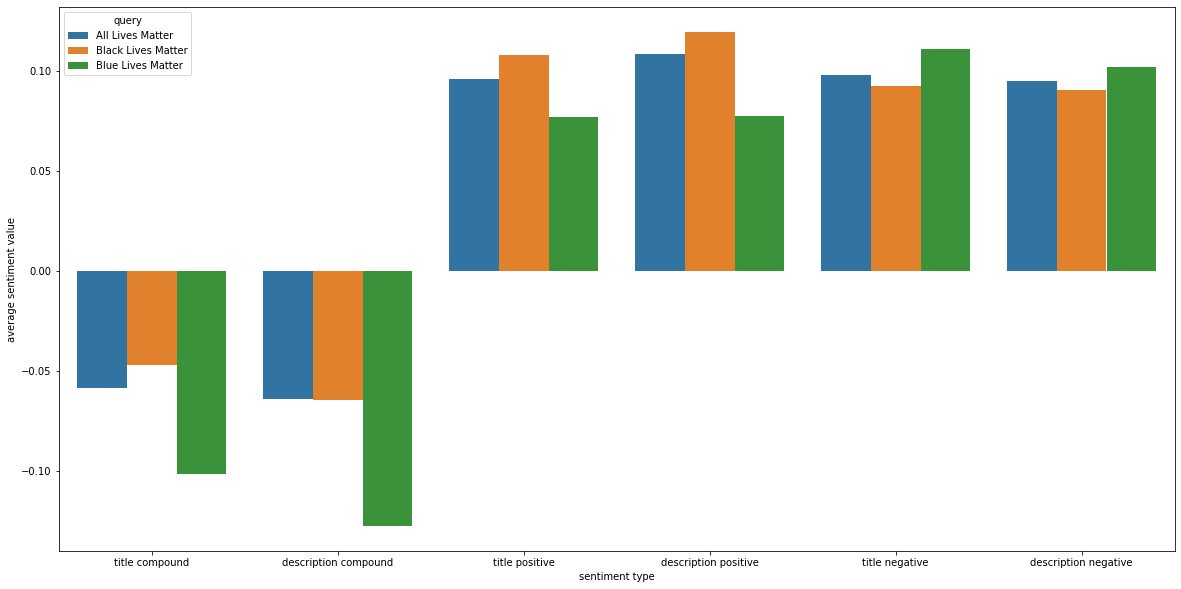

In [64]:
averageSentiment = allData.groupby(['query'])['title compound','description compound', "title positive", "description positive", "title negative", "description negative"].mean().unstack()

averageSentimentDf = pd.DataFrame(averageSentiment).reset_index()
averageSentimentDf = averageSentimentDf.rename(columns={0:"average sentiment value", "level_0": "sentiment type"})
f = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
sns.barplot(x="sentiment type", y= "average sentiment value", data=averageSentimentDf, hue='query')

In [65]:
def plotData(focus):
    f = plt.figure(figsize=(40,3))
    ax = plt.subplot(111)
#     focus = 'description positive'
    allData['date round'] = [x.strftime('%Y-%m-%d') for x in allData['date']]
    allData[allData['date round'] > '2020-06-14'].groupby('query').plot(x='date', y=focus, ax = ax)
    plt.ylabel(focus + ' sentiment')
    plt.title(focus + " over the past month")
    plt.xlabel("Date")
    plt.title(focus + " over the past month")
    plt.legend(['All Lives Matter', "Black Lives Matter", 'Blue Lives Matter'])

In [66]:
def plotDataRollingAverages(focus):
    f = plt.figure(figsize=(15,3))
    ax = plt.subplot(111)
    allData['date round'] = [x.strftime('%Y-%m-%d') for x in allData['date']]
    allData[allData['date round'] > '2020-06-13'].groupby(['query','date round'])[focus].mean().reset_index().groupby('query').plot(x='date round', y=focus, ax = ax)
    plt.legend(['All Lives Matter', "Black Lives Matter", 'Blue Lives Matter'])
    plt.ylabel(focus + ' sentiment')
    plt.xlabel("Date")
    plt.title("Rolling averages of " + focus + " over the past month")

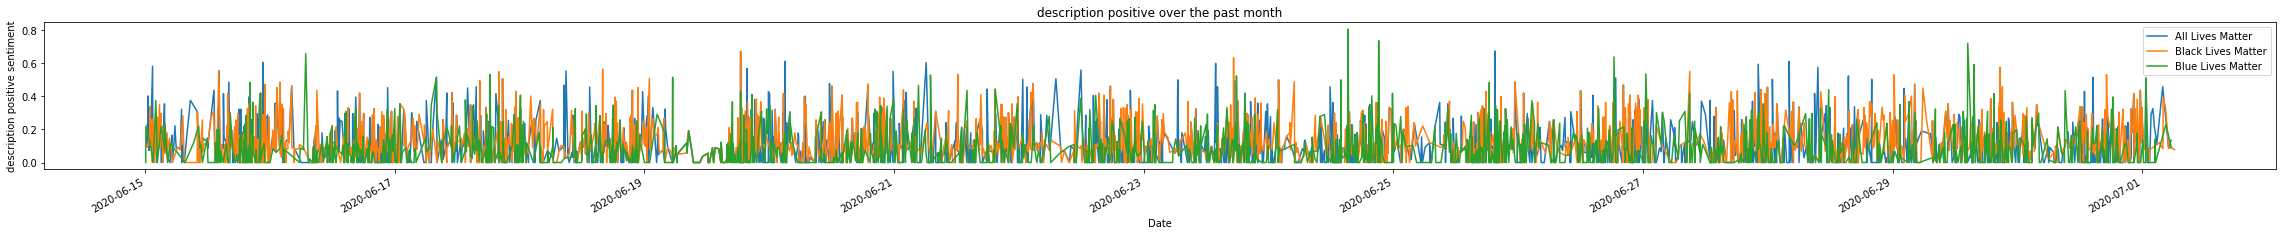

In [67]:
plotData('description positive')

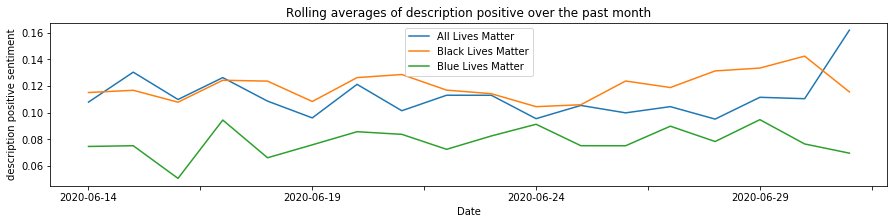

In [68]:
plotDataRollingAverages('description positive')

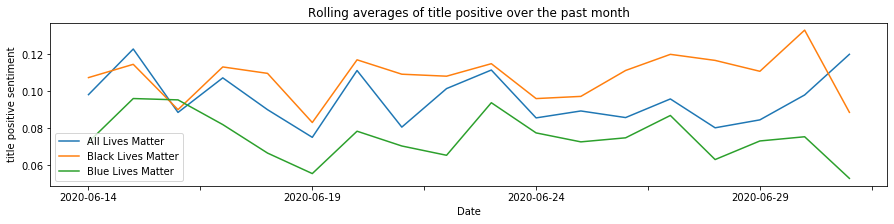

In [69]:
plotDataRollingAverages('title positive')

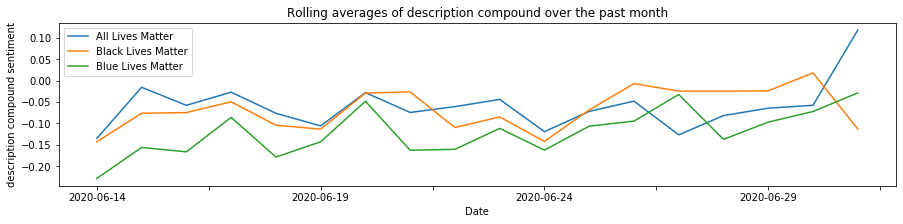

In [70]:
plotDataRollingAverages('description compound')

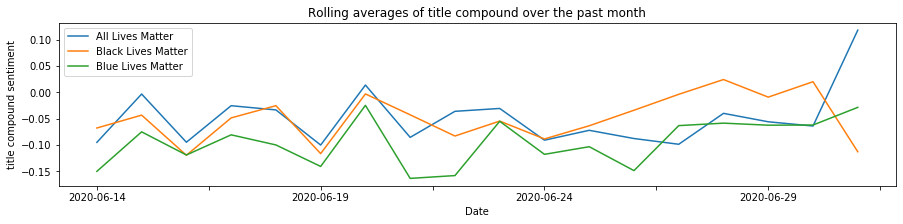

In [71]:
plotDataRollingAverages('title compound')

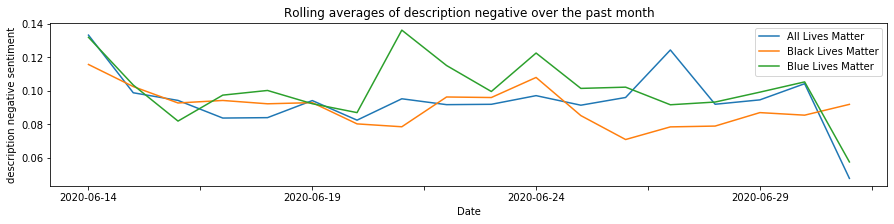

In [72]:
plotDataRollingAverages('description negative')

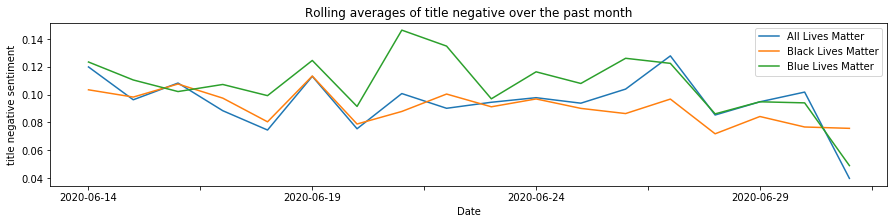

In [73]:
plotDataRollingAverages('title negative')

Text(0.5, 1.0, 'Article Count per Day')

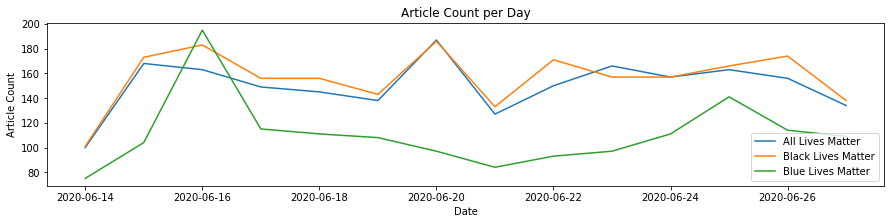

In [74]:
f = plt.figure(figsize=(15,3))
ax = plt.subplot(111)
allData[(allData['date round'] > '2020-06-13') & (allData['date round'] < '2020-06-28')].groupby(['query','date round'])['title compound'].count().reset_index().groupby('query').plot(x='date round', y='title compound', ax = ax)
plt.legend(['All Lives Matter', "Black Lives Matter", 'Blue Lives Matter'])
plt.xlabel("Date")
plt.ylabel("Article Count")
plt.title("Article Count" + " per Day")